<a href="https://colab.research.google.com/github/Tahimi/numericalMethods/blob/main/aula02_implicitMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math

# Problem definition
problem1 = {'name': 'problem1',
            'x0': 0,
            'xn': 0.4,
            'h': 0.1,
            'y0': 1,
            'f': lambda x, y: (y - x - 1)**2 + 2,
            'fa': lambda x: x + math.tan(x) + 1}
print(problem1)

{'name': 'problem1', 'x0': 0, 'xn': 0.4, 'h': 0.1, 'y0': 1, 'f': <function <lambda> at 0x7f2bea8cf430>, 'fa': <function <lambda> at 0x7f2bea930dc0>}


In [ ]:
import math
problem4 = {'name': 'problem4',
            'x0': 0,
            'xn': 1,
            'h': 0.2,
            'y0': -1,
            'f': lambda x, y: 5*exp(5*x)*(y - x)**2 + 1,
            'fa': lambda x: x - exp(-5*x)}

In [ ]:
import math
# rigid problem
problem5 = {'name': 'problem5',
            'x0': 0,
            'xn': 1.5,
            'h': 0.1,
            'y0': 1/3.,
            'f': lambda x, y: -30*y,
            'fa': lambda x: exp(-30*x)/3.}

In [ ]:
import math
problem6 = {'name': 'problem6',
            'x0': 0,
            'xn': 2,
            'h': 0.2,
            'y0': 0.5,
            'f': lambda x, y: y - x**2 + 1,
            'fa': lambda x: (x + 1)**2 - 0.5*exp(x)}

In [ ]:
problem = problem5

In [ ]:
f = problem1['f']
print(f(1,2))

2


In [ ]:
from sympy import *

x, y = symbols('x y')
print(f(x,y))

(-x + y - 1)**2 + 2


In [ ]:
x, y, h, yNext = symbols('x y h yNext')
print(yNext - (y + f(x + h, yNext)))

-y + yNext - (-h - x + yNext - 1)**2 - 2


In [ ]:
LHSExpr = yNext - (y + f(x + h, yNext))
print(solve(LHSExpr, yNext))

[h + x - sqrt(4*h + 4*x - 4*y - 3)/2 + 3/2, h + x + sqrt(4*h + 4*x - 4*y - 3)/2 + 3/2]


In [ ]:
yip1Expr = solve(LHSExpr, yNext)[0]
print(yip1Expr)

h + x - sqrt(4*h + 4*x - 4*y - 3)/2 + 3/2


In [ ]:
yip1 = lambda xValue, yValue, hValue: yip1Expr.subs([(x, xValue), (y, yValue), (h, hValue)])
print(yip1(1,2,0.1))

2.6 - 1.28452325786651*I


In [ ]:
# Evaluating (using SymPy) and Adding the function 'yip1' to problem, (needed by Implicit Euler Algorithm)
# yNext = y + h*f(x + h, yNext) --> yNext - (y + h*f(x + h, yNext)) = 0 --> LHS(x + h, y, h, yNext) = 0
from sympy import *

x, y, h, yNext = symbols('x y h yNext')
LHSExpr = yNext - (y + h*problem['f'](x + h, yNext))
yNextExprList = solve(LHSExpr, yNext)
display(yNextExprList)

[y/(30*h + 1)]

In [ ]:
# we take the correct soltion from the list, (the one that corresponds to the problem's interval)
# Choosing the first expression, yNextExprList[0], (one must check the other expression(s))
yip1 = yNextExprList[0]
print('yip1 = ', yip1)

yip1 =  re(y/(30*h + 1))


In [ ]:
# aking a python function out of the expression and adding it to the problem description
problem['yip1'] = lambda xValue, yValue, hValue: yip1.subs([(x, xValue), (y, yValue), (h, hValue)])

# Displaying the problem with yip1
print(problem)

{'name': 'problem5', 'x0': 0, 'xn': 1.5, 'h': 0.1, 'y0': 0.3333333333333333, 'f': <function <lambda> at 0x7f6099a18550>, 'fa': <function <lambda> at 0x7f6099a185e0>, 'yip1': <function <lambda> at 0x7f607ade3940>}


In [ ]:
import inspect
def implicitEulerAlg1(problem):
  # naming this solver
  algName = inspect.stack()[0][3]

  # Reading the problem's data
  probName = problem['name']
  f = problem['f']
  x0 = problem['x0']
  xn = problem['xn']
  y0 = problem['y0']
  #fa = problem['fa']
  h = problem['h']
  yip1 = problem['yip1']

  # Variables Initialization
  x = x0
  y = y0

  # Saving the variables into Containers
  X = [x0]
  Y = [y0]

  n = int((xn - x0)/h)
  for i in range(1, n + 1): # i=1,2,...,n
    # Variables Updating
    y = yip1(x, y, h)
    x += h
    #print('i = ', i, ', x = %.2f' % x, ', y = %.4f' % y)

    # Variables Saving
    X += [x]
    Y += [y]

  print(algName, 'is done solving', probName)
  return X, Y

In [ ]:
# Calling the solver for problem1
import pandas as pd
df = pd.DataFrame({})
pd.options.display.float_format = '{:,.6f}'.format

df['X'], df['Y1'] = implicitEulerAlg1(problem)
display(df)

implicitEulerAlg1 is done solving problem5


,X,Y1
0,0.000000,0.333333
1,0.100000,0.0833333333333333
2,0.200000,0.0208333333333333
3,0.300000,0.00520833333333333
4,0.400000,0.00130208333333333
5,0.500000,0.000325520833333333
6,0.600000,8.13802083333333e-5
7,0.700000,2.03450520833333e-5
8,0.800000,5.08626302083333e-6
9,0.900000,1.27156575520833e-6


In [ ]:
df['Ya'] = [problem['fa'](x) for x in df['X']]
display(df)

,X,Y1,Ya
0,0.000000,0.333333,0.333333333333333
1,0.100000,0.0833333333333333,0.0165956894559546
2,0.200000,0.0208333333333333,0.000826250725555453
3,0.300000,0.00520833333333333,4.11366013622264e-5
4,0.400000,0.00130208333333333,2.04807078444274e-6
5,0.500000,0.000325520833333333,1.01967440167275e-7
6,0.600000,8.13802083333333e-5,5.07665991490421e-9
7,0.700000,2.03450520833333e-5,2.52752014263730e-10
8,0.800000,5.08626302083333e-6,1.25837818142637e-11
9,0.900000,1.27156575520833e-6,6.26509605513030e-13


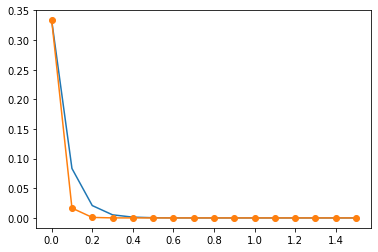

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['X'], df['Y1'])
plt.plot(df['X'], df['Ya'], marker = 'o')

plt.show()

# Solving the implicit equation using Newton method, **implicitEulerAlg2**

In [ ]:
import inspect
from sympy import *

def implicitEulerAlgWithNewton(problem):
  # naming this solver
  algName = inspect.stack()[0][3]

  # Reading the problem's data
  probName = problem['name']
  f = problem['f']
  x0 = problem['x0']
  xn = problem['xn']
  y0 = problem['y0']
  #fa = problem['fa']
  h = problem['h']
  #yip1 = problem['yip1']

  # Preparing the implicit equation in yNext, FGlobal(x, y, h, yNext) = 0
  # yNext = y + h*f(x + h, yNext) --> yNext - (y + h*f(x + h, yNext)) = 0 --> FGlobal(x, y, h, yNext) = 0
  x_, y_, h_, yNext_ = symbols('x_ y_ h_ yNext_')
  FGlobal_ = yNext_ - (y_ + h_*f(x_ + h_, yNext_))
  #display('FGlobal_ = ', FGlobal_)

  # Variables Initialization
  x = x0
  y = y0

  # Saving the variables into Containers
  X = [x0]
  Y = [y0]

  n = int((xn - x0)/h)
  for i in range(1, n + 1): # i=1,2,...,n
    # Preparing the implicit equation in x, F(x) = 0 and the condition x = xInit
    # substituting the values of x, y, and h, (and renaming the unkown yNext as x for convenience reason)
    F_ = FGlobal_.subs([(x_, x), (y_, y), (h_, h), (yNext_, x_)])
    xInit = y

    # Variables Updating
    y = newtonAlg(F_ = F_, xInit = xInit, absTol = 1e-10)
    x += h

    # Variables Saving
    X += [x]
    Y += [y]
    #print('i = ', i, ', x = %.2f' % x, ', y = %.4f' % y)

  print(algName, 'is done solving', probName)
  return X, Y

In [ ]:
from sympy import *

def newtonAlg(F_, xInit, absTol):
  x_ = Symbol('x_')
  dFdx_ = diff(F_, x_)

  X = [xInit]
  while True:
    x = X[-1]
    x -= F_.subs(x_, x)/dFdx_.subs(x_, x)
    dx = abs(x - X[-1])
    if dx < absTol*abs(x) and dx < absTol:
      break
    X += [x]

  return X[-1]

In [ ]:
_, df['Y2'] = implicitEulerAlgWithNewton(problem)
display(df)

implicitEulerAlgWithNewton is done solving problem5


,X,Y1,Ya,Y2
0,0.000000,0.333333,0.333333333333333,0.333333
1,0.100000,0.0833333333333333,0.0165956894559546,0.0833333333333333
2,0.200000,0.0208333333333333,0.000826250725555453,0.0208333333333333
3,0.300000,0.00520833333333333,4.11366013622264e-5,0.00520833333333333
4,0.400000,0.00130208333333333,2.04807078444274e-6,0.00130208333333333
5,0.500000,0.000325520833333333,1.01967440167275e-7,0.000325520833333333
6,0.600000,8.13802083333333e-5,5.07665991490421e-9,8.13802083333333e-5
7,0.700000,2.03450520833333e-5,2.52752014263730e-10,2.03450520833333e-5
8,0.800000,5.08626302083333e-6,1.25837818142637e-11,5.08626302083333e-6
9,0.900000,1.27156575520833e-6,6.26509605513030e-13,1.27156575520833e-6


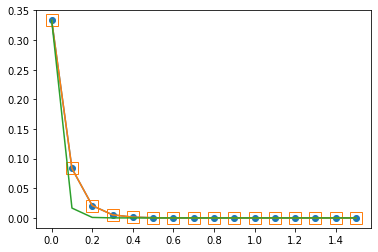

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['X'], df['Y1'], marker = 'o')
plt.plot(df['X'], df['Y2'], marker = 's', markerfacecolor='none', markersize=12)
plt.plot(df['X'], df['Ya'])

plt.show()

In [ ]:
import inspect
from sympy import *

def implicitAdamsMoulton4StepsAlgWithNewton(problem):
  # naming this solver
  algName = inspect.stack()[0][3]

  # Reading the problem's data
  probName = problem['name']
  f = problem['f']
  x0 = problem['x0']
  xn = problem['xn']
  y0 = problem['y0']
  #fa = problem['fa']
  h = problem['h']
  #yip1 = problem['yip1']

  # Preparing the implicit equation in yNext, FGlobal(x, y, h, y1, y2, y3, yNext) = 0
  x_, y_, h_, y1_, y2_, y3_, yNext_ = symbols('x_ y_ h_ y1_ y2_ y3_ yNext_')
  FGlobal_ = yNext_ - (y_ + (h_/720.)*(251*f(x_ + h_, yNext_)
                                     + 646*f(x_, y_)
                                     - 264*f(x_ - h_, y1_)
                                     + 106*f(x_ - 2*h_, y2_)
                                     -  19*f(x_ - 3*h_, y3_)))
  #display('FGlobal_ = ', FGlobal_)

  # Variables Initialization
  x = x0
  y = y0

  # Saving the variables into Containers
  X = [x0]
  Y = [y0]

  ##########
  stepsNbr = 4
  for i in range(1, stepsNbr): # i=1,2,3
    # Variables Updating: computing y1 using Runge-Kutta4 method
    k1 = h*f(x, y)
    k2 = h*f(x + h/2., y + k1/2.)
    k3 = h*f(x + h/2., y + k2/2.)
    k4 = h*f(x + h, y + k3)
    y += (k1 + 2*k2 + 2*k3 + k4)/6.
    x += h

    #print('i = ', i, ', x = %.2f' % x, ', y = %.4f' % y)
    # Variables Saving for xi and yi, for i = 1
    X += [x]
    Y += [y]
  ##########

  n = int((xn - x0)/h)
  for i in range(stepsNbr, n + 1): # i=1,2,...,n
    # Preparing the implicit equation in x, F(x) = 0 and the condition x = xInit
    # substituting the values of x, y, and h, (and renaming the unkown yNext as x for convenience reason)
    F_ = FGlobal_.subs([(x_, x),
                        (y_, y),
                        (h_, h),
                        (y1_, Y[-2]),
                        (y2_, Y[-3]),
                        (y3_, Y[-4]),
                        (yNext_, x_)])
    xInit = y

    # Variables Updating
    y = newtonAlg(F_ = F_, xInit = xInit, absTol = 1e-10)
    x += h

    # Variables Saving
    X += [x]
    Y += [y]
    #print('i = ', i, ', x = %.2f' % x, ', y = %.4f' % y)

  print(algName, 'is done solving', probName)
  return X, Y

In [ ]:
_, df['Y3'] = implicitAdamsMoulton4StepsAlgWithNewton(problem)
display(df)

implicitAdamsMoulton4StepsAlgWithNewton is done solving problem5


,X,Y1,Ya,Y2,Y3
0,0.000000,0.333333,0.333333333333333,0.333333,0.333333
1,0.100000,0.0833333333333333,0.0165956894559546,0.0833333333333333,0.458333
2,0.200000,0.0208333333333333,0.000826250725555453,0.0208333333333333,0.630208
3,0.300000,0.00520833333333333,4.11366013622264e-5,0.00520833333333333,0.866536
4,0.400000,0.00130208333333333,2.04807078444274e-6,0.00130208333333333,-0.463724647827563
5,0.500000,0.000325520833333333,1.01967440167275e-7,0.000325520833333333,0.731047010219940
6,0.600000,8.13802083333333e-5,5.07665991490421e-9,8.13802083333333e-5,-1.01651181145778
7,0.700000,2.03450520833333e-5,2.52752014263730e-10,2.03450520833333e-5,1.36724890331564
8,0.800000,5.08626302083333e-6,1.25837818142637e-11,5.08626302083333e-6,-1.85287968302045
9,0.900000,1.27156575520833e-6,6.26509605513030e-13,1.27156575520833e-6,2.51499594091718


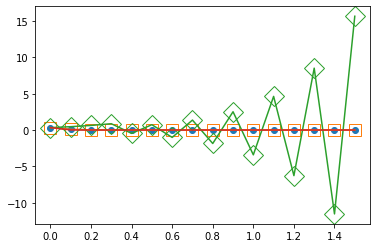

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['X'], df['Y1'], marker = 'o')
plt.plot(df['X'], df['Y2'], marker = 's', markerfacecolor='none', markersize=12)
plt.plot(df['X'], df['Y3'], marker = 'D', markerfacecolor='none', markersize=14)
plt.plot(df['X'], df['Ya'])

plt.show()

In [ ]:
import inspect
from sympy import *

# obs. this test uses the exact sol for evaluating the first steps
# see page 285 of Richard L. Burden, Análise Numérica
# in general, the exact sol in not known
def implicitAdamsMoulton4StepsAlgWithNewtonTest(problem):
  # naming this solver
  algName = inspect.stack()[0][3]

  # Reading the problem's data
  probName = problem['name']
  f = problem['f']
  x0 = problem['x0']
  xn = problem['xn']
  y0 = problem['y0']
  fa = problem['fa']
  h = problem['h']
  #yip1 = problem['yip1']

  # Preparing the implicit equation in yNext, FGlobal(x, y, h, y1, y2, y3, yNext) = 0
  x_, y_, h_, y1_, y2_, y3_, yNext_ = symbols('x_ y_ h_ y1_ y2_ y3_ yNext_')
  FGlobal_ = yNext_ - (y_ + (h_/720.)*(251*f(x_ + h_, yNext_)
                                     + 646*f(x_, y_)
                                     - 264*f(x_ - h_, y1_)
                                     + 106*f(x_ - 2*h_, y2_)
                                     -  19*f(x_ - 3*h_, y3_)))
  #display('FGlobal_ = ', FGlobal_)

  # Variables Initialization
  x = x0
  y = y0

  # Saving the variables into Containers
  X = [x0]
  Y = [y0]

  ##########
  stepsNbr = 4
  for i in range(1, stepsNbr): # i=1,2,3
    # Variables Updating: computing y1 from exact solution, fa
    y = fa(float(df['X'][i]))
    x += h

    #print('i = ', i, ', x = %.2f' % x, ', y = %.4f' % y)
    # Variables Saving for xi and yi, for i = 1
    X += [x]
    Y += [y]
  ##########

  n = int((xn - x0)/h)
  for i in range(stepsNbr, n + 1): # i=1,2,...,n
    # Preparing the implicit equation in x, F(x) = 0 and the condition x = xInit
    # substituting the values of x, y, and h, (and renaming the unkown yNext as x for convenience reason)
    F_ = FGlobal_.subs([(x_, x),
                        (y_, y),
                        (h_, h),
                        (y1_, Y[-2]),
                        (y2_, Y[-3]),
                        (y3_, Y[-4]),
                        (yNext_, x_)])
    xInit = y

    # Variables Updating
    y = newtonAlg(F_ = F_, xInit = xInit, absTol = 1e-10)
    x += h

    # Variables Saving
    X += [x]
    Y += [y]
    #print('i = ', i, ', x = %.2f' % x, ', y = %.4f' % y)

  print(algName, 'is done solving', probName)
  return X, Y

In [ ]:
_, df['Y4'] = implicitAdamsMoulton4StepsAlgWithNewtonTest(problem)
display(df)

implicitAdamsMoulton4StepsAlgWithNewtonTest is done solving problem5


,X,Y1,Ya,Y2,Y3,Y4
0,0.000000,0.333333,0.333333333333333,0.333333,0.333333,0.333333
1,0.100000,0.0833333333333333,0.0165956894559546,0.0833333333333333,0.458333,0.0165956894559546
2,0.200000,0.0208333333333333,0.000826250725555453,0.0208333333333333,0.630208,0.000826250725555453
3,0.300000,0.00520833333333333,4.11366013622264e-5,0.00520833333333333,0.866536,4.11366013622264e-5
4,0.400000,0.00130208333333333,2.04807078444274e-6,0.00130208333333333,-0.463724647827563,0.00972631157310736
5,0.500000,0.000325520833333333,1.01967440167275e-7,0.000325520833333333,0.731047010219940,-0.00755659249117658
6,0.600000,8.13802083333333e-5,5.07665991490421e-9,8.13802083333333e-5,-1.01651181145778,0.0115011427510371
7,0.700000,2.03450520833333e-5,2.52752014263730e-10,2.03450520833333e-5,1.36724890331564,-0.0156713071403567
8,0.800000,5.08626302083333e-6,1.25837818142637e-11,5.08626302083333e-6,-1.85287968302045,0.0211500022590883
9,0.900000,1.27156575520833e-6,6.26509605513030e-13,1.27156575520833e-6,2.51499594091718,-0.0286900659698296


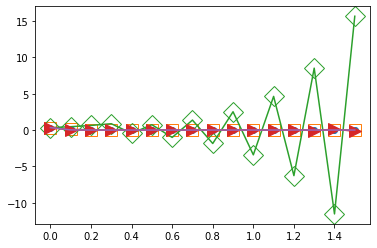

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['X'], df['Y1'], marker = 'o')
plt.plot(df['X'], df['Y2'], marker = 's', markerfacecolor='none', markersize=12)
plt.plot(df['X'], df['Y3'], marker = 'D', markerfacecolor='none', markersize=14)
plt.plot(df['X'], df['Y4'], marker = '>', markersize=12)
plt.plot(df['X'], df['Ya'])

plt.show()

In [ ]:
import inspect
from sympy import *

# this one doesn't use newton to solve the implicit equation,
# in predict with the explicit Bashforth and correct with the implicit
# of Adams using the predicted value.
def adamsPreditorCorrector4Steps(problem):
  # naming this solver
  algName = inspect.stack()[0][3]

  # Reading the problem's data
  probName = problem['name']
  f = problem['f']
  x0 = problem['x0']
  xn = problem['xn']
  y0 = problem['y0']
  #fa = problem['fa']
  h = problem['h']
  #yip1 = problem['yip1']

  # Variables Initialization
  x = x0
  y = y0

  # Saving the variables into Containers
  X = [x0]
  Y = [y0]

  ##########
  stepsNbr = 4
  for i in range(1, stepsNbr): # i=1,2,3
    # Variables Updating: computing y1 using Runge-Kutta4 method
    k1 = h*f(x, y)
    k2 = h*f(x + h/2., y + k1/2.)
    k3 = h*f(x + h/2., y + k2/2.)
    k4 = h*f(x + h, y + k3)
    y += (k1 + 2*k2 + 2*k3 + k4)/6.
    x += h

    #print('i = ', i, ', x = %.2f' % x, ', y = %.4f' % y)
    # Variables Saving for xi and yi, for i = 1
    X += [x]
    Y += [y]
  ##########

  n = int((xn - x0)/h)
  for i in range(stepsNbr, n + 1): # i=1,2,...,n
    # Variables Updating
    # predict: Adams-Bashforth4Steps
    k = y + (h/24.)*(  55*f(x, y) \
                     - 59*f(X[-2], Y[-2]) \
                     + 37*f(X[-3], Y[-3]) \
                     -  9*f(X[-4], Y[-4]))
    # correct: Adams-Moulton3Steps
    y += (h/24.)*(   9*f(x + h, k) \
                  + 19*f(x, y) \
                  - 5*f(X[-2], Y[-2]) \
                  + f(X[-3], Y[-3]))
    '''
    # correct: Adams-Moulton4Steps
    y += (h/720.)*(  251*f(x + h, k) \
                   + 646*f(x, y) \
                   - 264*f(X[-2], Y[-2]) \
                   + 106*f(X[-3], Y[-3]) \
                   -  19*f(X[-4], Y[-4]))
    '''
    x += h

    # Variables Saving
    X += [x]
    Y += [y]
    #print('i = ', i, ', x = %.2f' % x, ', y = %.4f' % y)

  print(algName, 'is done solving', probName)
  return X, Y

In [ ]:
_, df['Y5'] = adamsPreditorCorrector4Steps(problem)
display(df)

adamsPreditorCorrector4Steps is done solving problem5


,X,Y1,Ya,Y2,Y3,Y4,Y5
0,0.000000,0.333333,0.333333333333333,0.333333,0.333333,0.333333,0.333333
1,0.100000,0.0833333333333333,0.0165956894559546,0.0833333333333333,0.458333,0.0165956894559546,0.458333
2,0.200000,0.0208333333333333,0.000826250725555453,0.0208333333333333,0.630208,0.000826250725555453,0.630208
3,0.300000,0.00520833333333333,4.11366013622264e-5,0.00520833333333333,0.866536,4.11366013622264e-5,0.866536
4,0.400000,0.00130208333333333,2.04807078444274e-6,0.00130208333333333,-0.463724647827563,0.00972631157310736,1.606496
5,0.500000,0.000325520833333333,1.01967440167275e-7,0.000325520833333333,0.731047010219940,-0.00755659249117658,4.381243
6,0.600000,8.13802083333333e-5,5.07665991490421e-9,8.13802083333333e-5,-1.01651181145778,0.0115011427510371,14.211002
7,0.700000,2.03450520833333e-5,2.52752014263730e-10,2.03450520833333e-5,1.36724890331564,-0.0156713071403567,47.834646
8,0.800000,5.08626302083333e-6,1.25837818142637e-11,5.08626302083333e-6,-1.85287968302045,0.0211500022590883,161.574719
9,0.900000,1.27156575520833e-6,6.26509605513030e-13,1.27156575520833e-6,2.51499594091718,-0.0286900659698296,545.381482


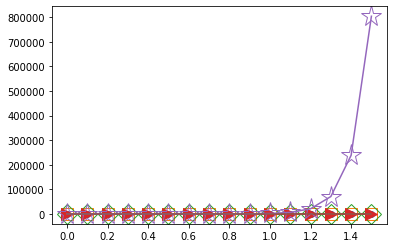

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['X'], df['Y1'], marker = 'o')
plt.plot(df['X'], df['Y2'], marker = 's', markerfacecolor='none', markersize=12)
plt.plot(df['X'], df['Y3'], marker = 'D', markerfacecolor='none', markersize=14)
plt.plot(df['X'], df['Y4'], marker = '>', markersize=12)
plt.plot(df['X'], df['Y5'], marker = '*', markersize=22, markerfacecolor='none')
plt.plot(df['X'], df['Ya'])

plt.show()